<a href="https://colab.research.google.com/github/Sunilkumar414674/PRODIGY_DS_04/blob/main/TASK4S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 140MB/s]


In [11]:
from zipfile import ZipFile
a='/content/twitter-entity-sentiment-analysis.zip'

with ZipFile(a, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [17]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

data processing

In [28]:
c=b=pd.read_csv('/content/twitter_training.csv')
c

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [35]:
column_names=['Tweet ID','entity','sentiment','Tweet content']
c=b=pd.read_csv('/content/twitter_training.csv',names=column_names,encoding= 'ISO-8859-1')
c

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [37]:
print(c.isnull().sum())

# Basic statistics
print(c.describe())
print(c['entity'].value_counts())

Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64
           Tweet ID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000
entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
jo

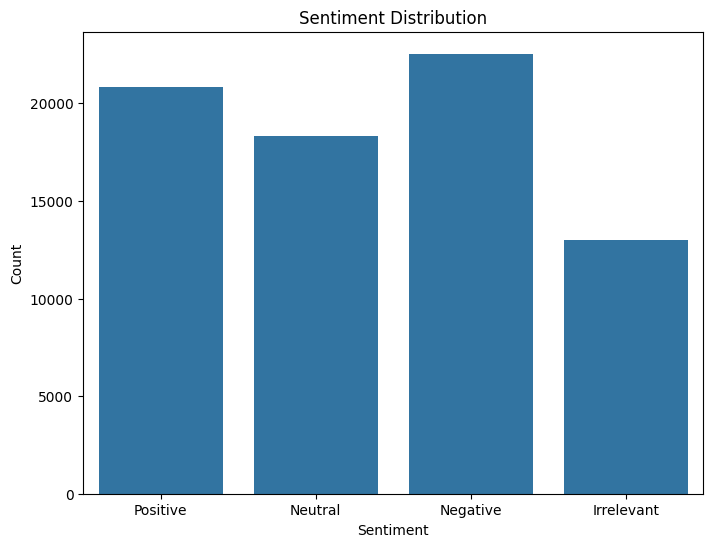

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=c)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

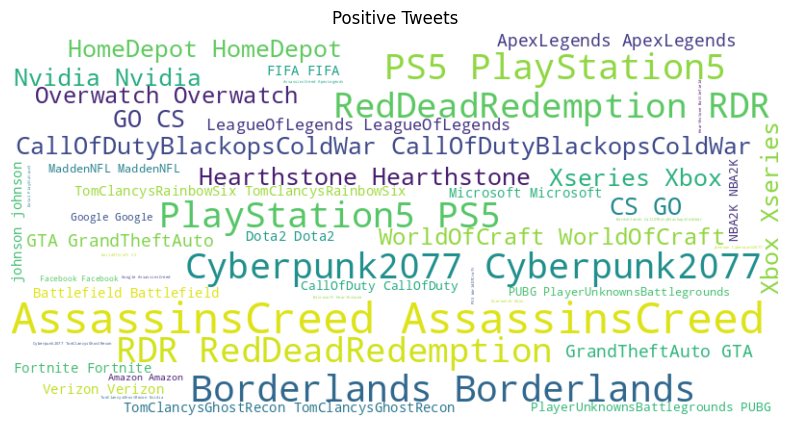

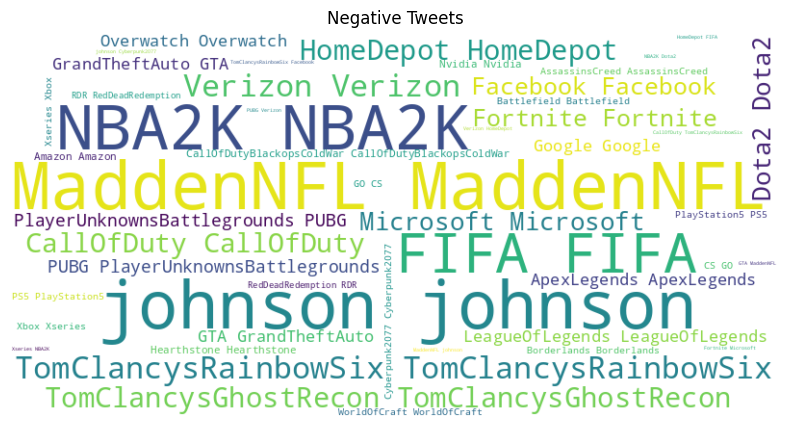

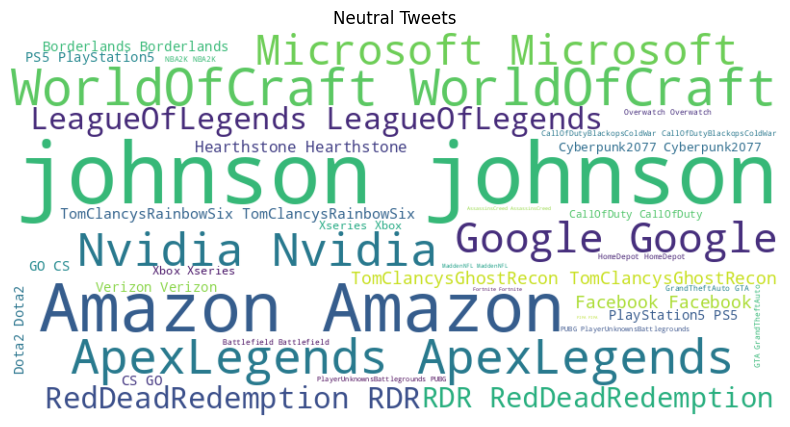

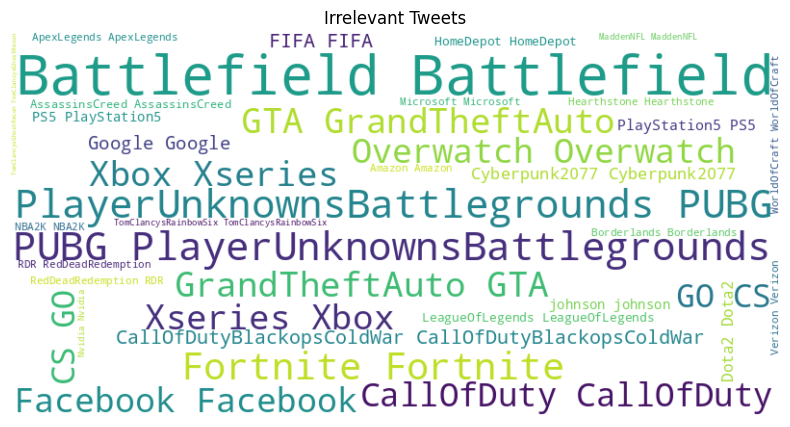

In [61]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=1000, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for different sentiments
Positive_text = ' '.join(c[c['sentiment'] == 'Positive']['entity'])
Negative_text = ' '.join(c[c['sentiment'] == 'Negative']['entity'])
Neutral_text = ' '.join(c[c['sentiment'] == 'Neutral']['entity'])
Irrelevant_text = ' '.join(c[c['sentiment'] == 'Irrelevant']['entity'])

generate_wordcloud(Positive_text, 'Positive Tweets')
generate_wordcloud(Negative_text, 'Negative Tweets')
generate_wordcloud(Neutral_text, 'Neutral Tweets')
generate_wordcloud(Irrelevant_text, 'Irrelevant Tweets')

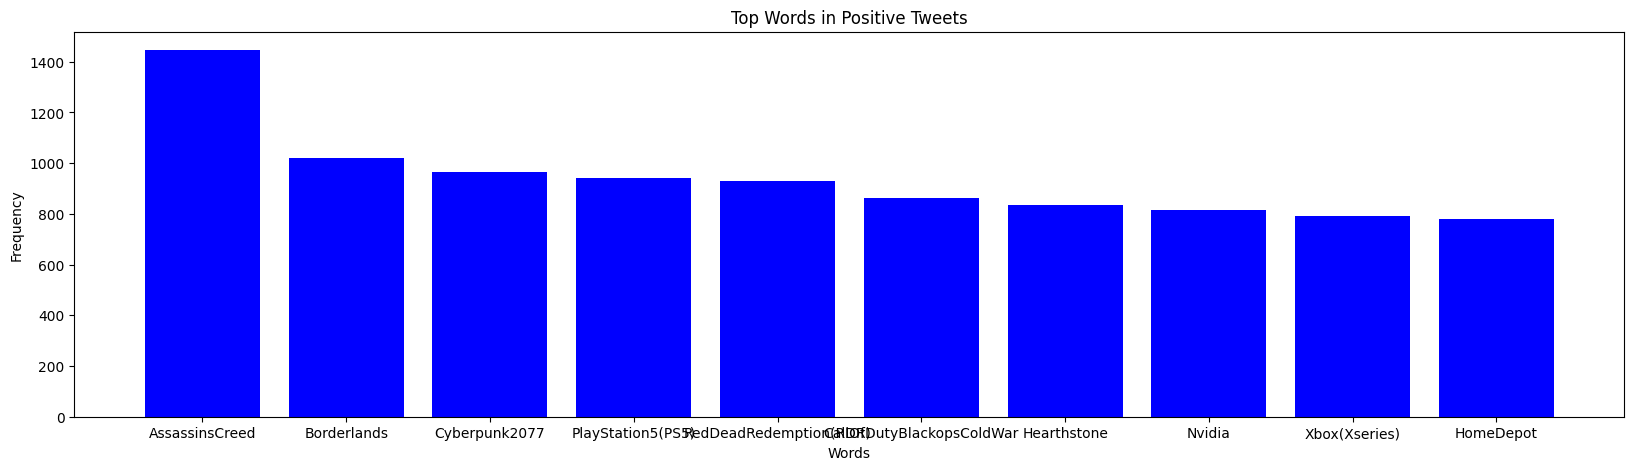

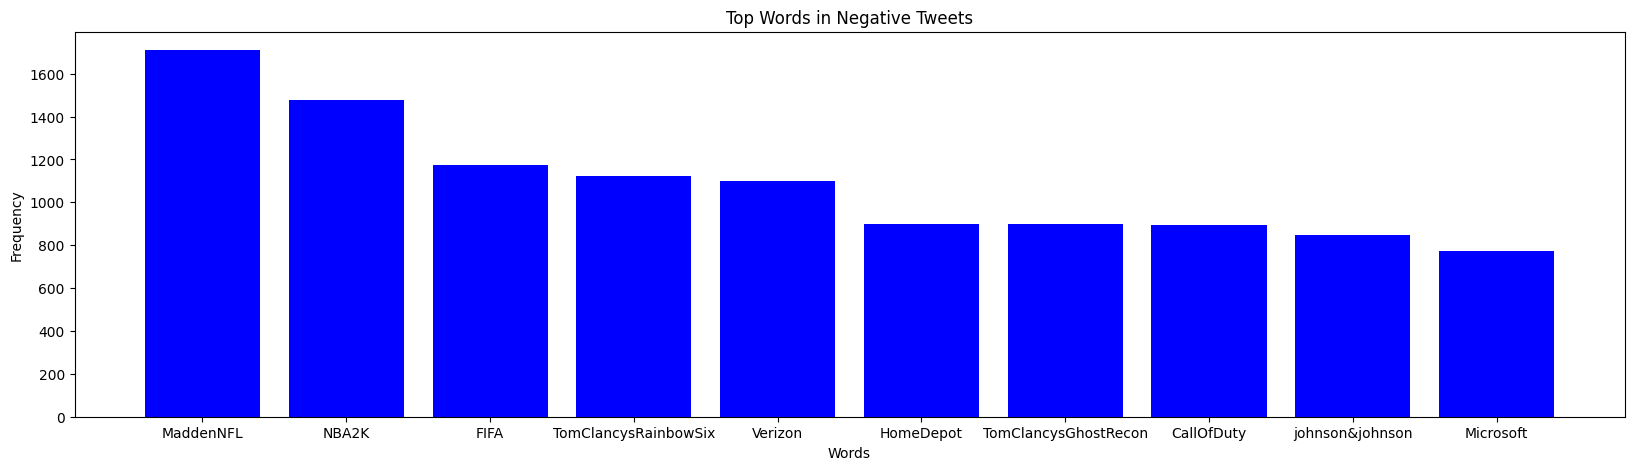

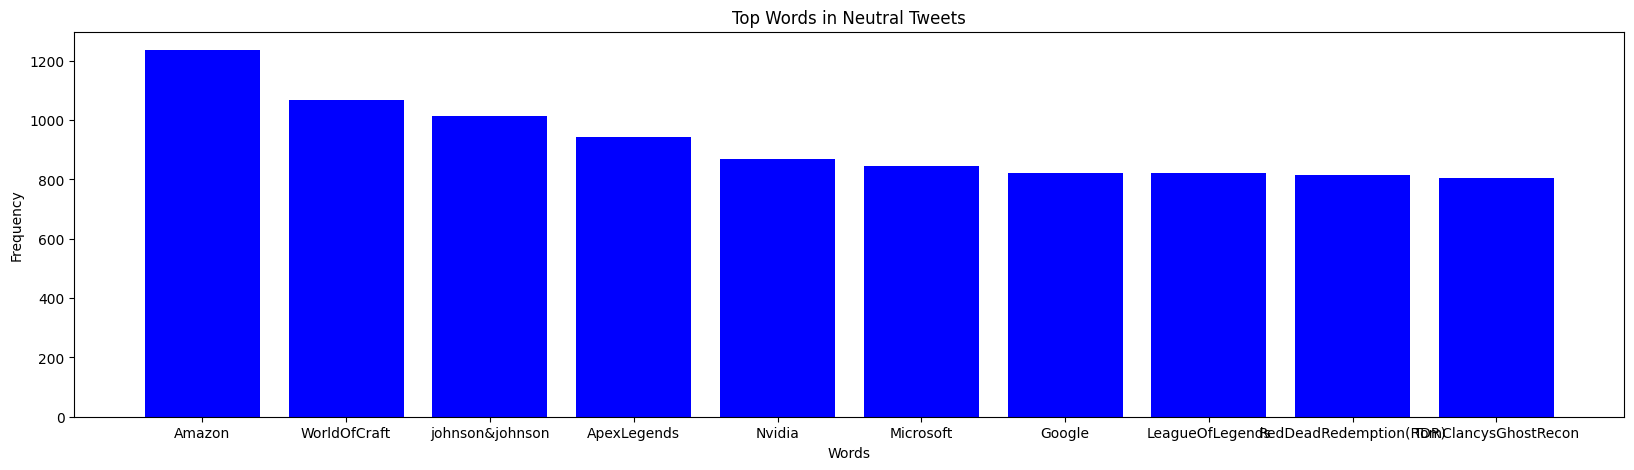

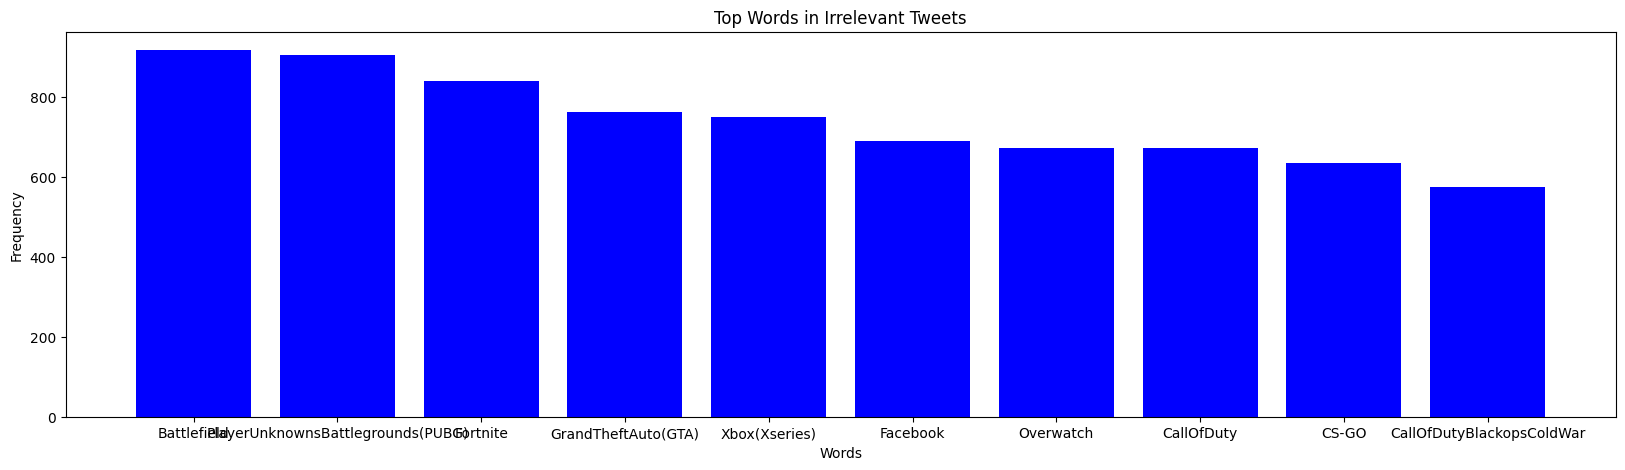

In [66]:
from collections import Counter

# Function to plot bar chart of word frequencies
def plot_word_freq(text, title):
    word_counts = Counter(text.split())
    common_words = word_counts.most_common(10)
    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]

    plt.figure(figsize=(20, 5))
    plt.bar(words, counts, color='blue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Plot word frequencies for different sentiments
plot_word_freq(Positive_text, 'Top Words in Positive Tweets')
plot_word_freq(Negative_text, 'Top Words in Negative Tweets')
plot_word_freq(Neutral_text, 'Top Words in Neutral Tweets')
plot_word_freq(Irrelevant_text, 'Top Words in Irrelevant Tweets')


In [73]:

### Step 5: Feature Extractio
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)
x = tfidf.fit_transform(c['sentiment'])
y = c['sentiment']


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [77]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00      2592
    Negative       1.00      1.00      1.00      4519
     Neutral       1.00      1.00      1.00      3596
    Positive       1.00      1.00      1.00      4230

    accuracy                           1.00     14937
   macro avg       1.00      1.00      1.00     14937
weighted avg       1.00      1.00      1.00     14937



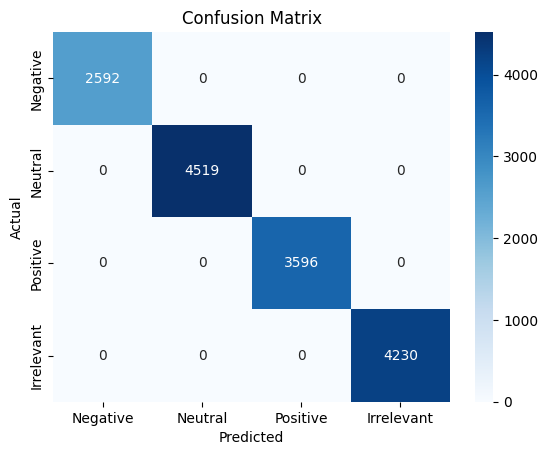

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive','Irrelevant'], yticklabels=['Negative', 'Neutral', 'Positive','Irrelevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()